In [99]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [100]:
data = pd.read_csv("housing.csv")

# Data Exploration

In [101]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [103]:
data.dropna(inplace=True)

In [104]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'],axis=1)
y = data['median_house_value']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [106]:
train_data = X_train.join(y_train)

In [107]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9733,-121.66,36.82,17.0,3921.0,654.0,1895.0,641.0,5.0092,<1H OCEAN,238700.0
7433,-118.21,33.94,40.0,2227.0,594.0,2244.0,580.0,2.4459,<1H OCEAN,143800.0
10673,-117.85,33.62,13.0,5192.0,658.0,1865.0,662.0,15.0001,<1H OCEAN,500001.0
14276,-117.13,32.70,38.0,1445.0,392.0,1286.0,357.0,1.4632,NEAR OCEAN,80200.0
8334,-118.31,33.94,44.0,1854.0,367.0,976.0,335.0,3.6583,<1H OCEAN,126700.0
...,...,...,...,...,...,...,...,...,...,...
4425,-118.24,34.07,27.0,223.0,80.0,249.0,82.0,1.6136,<1H OCEAN,137500.0
887,-121.99,37.55,16.0,6647.0,2098.0,4649.0,1903.0,2.9074,<1H OCEAN,213800.0
3710,-118.38,34.20,32.0,993.0,285.0,1044.0,248.0,2.4306,<1H OCEAN,187500.0
14893,-117.07,32.62,19.0,5016.0,1173.0,2750.0,1081.0,2.7838,NEAR OCEAN,155900.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

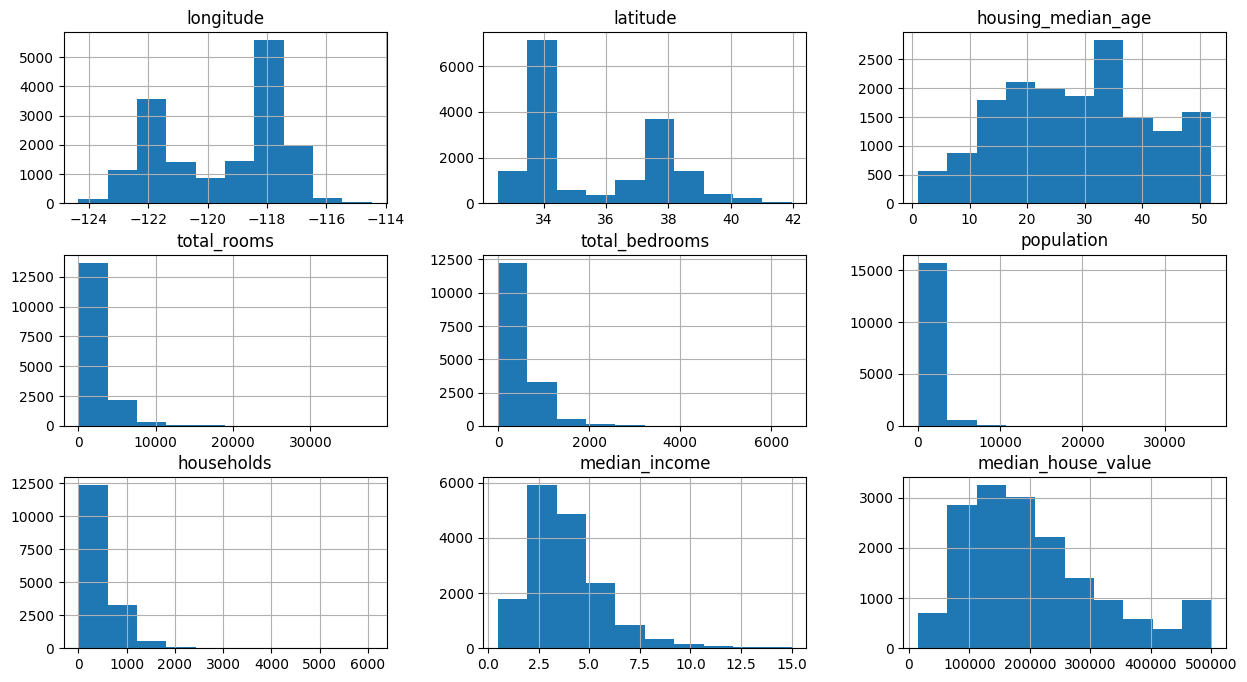

In [108]:
train_data.hist(figsize=(15,8))

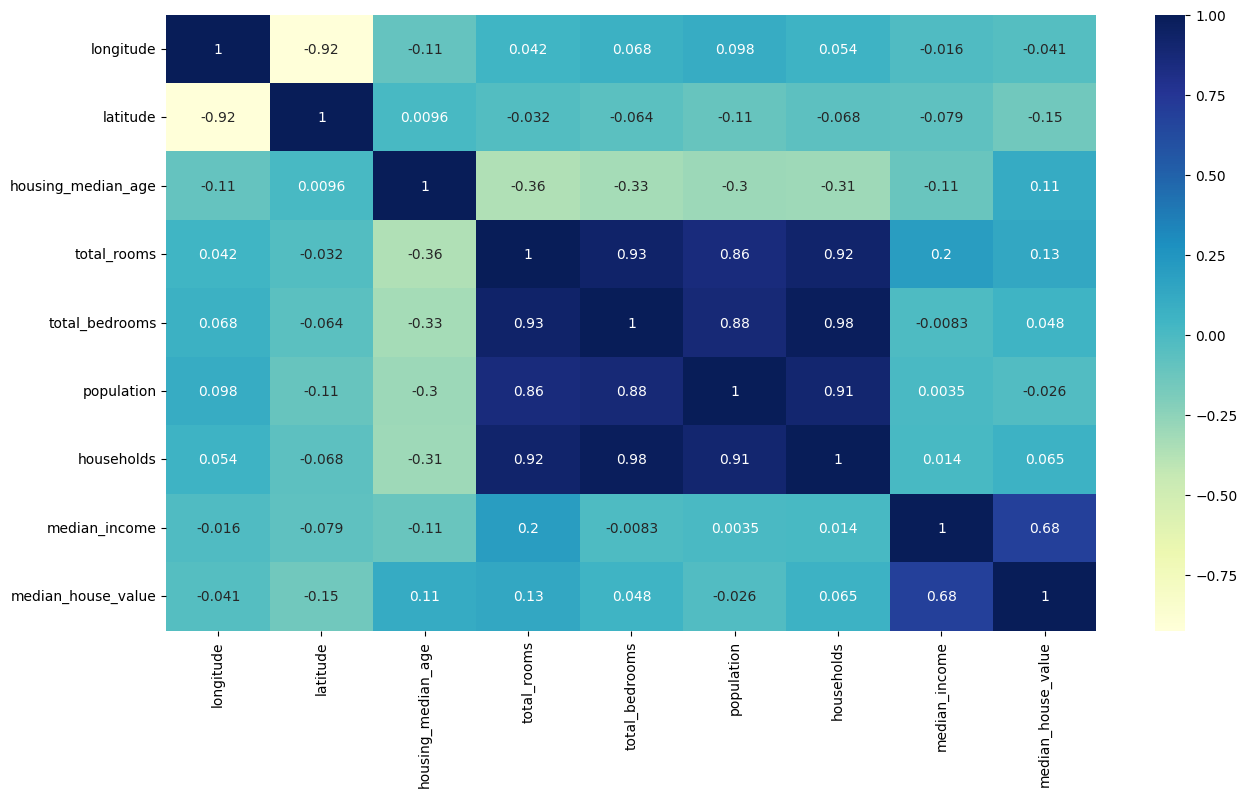

In [109]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.drop("ocean_proximity", axis=1).corr(),annot=True, cmap="YlGnBu")
plt.show()

# Data Preprocessing

In [110]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

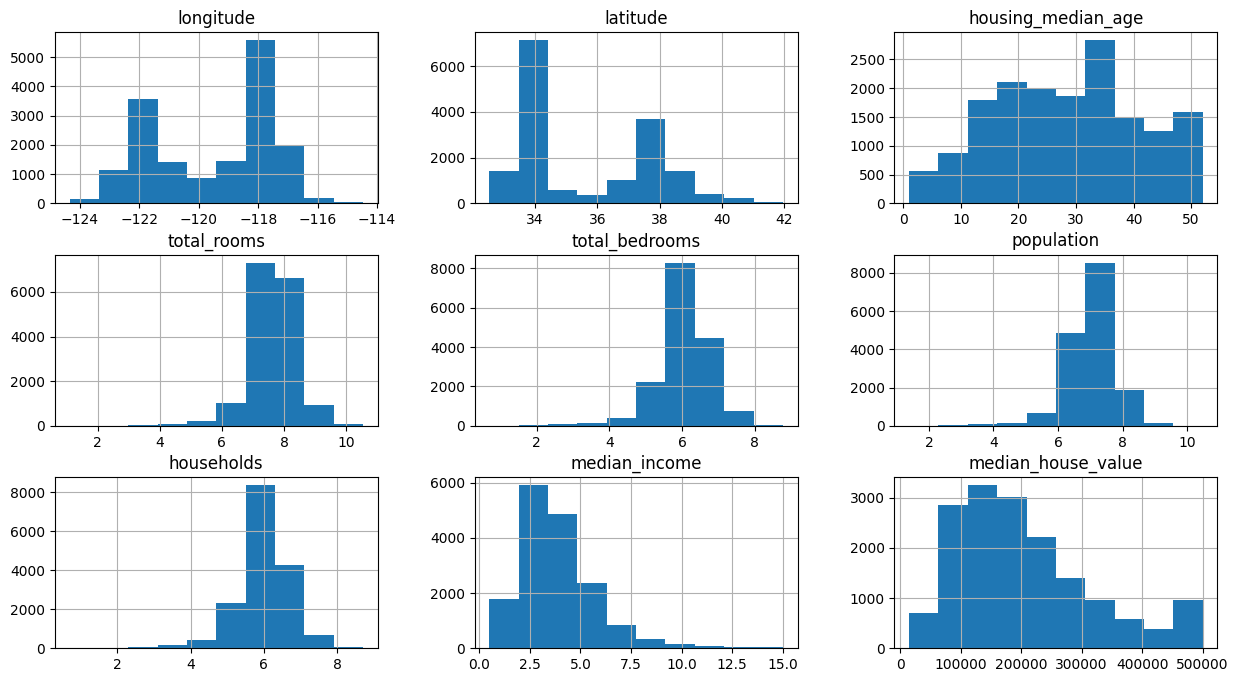

In [111]:
train_data.hist(figsize=(15,8))

In [112]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(int)).drop(['ocean_proximity'], axis=1)


In [113]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9733,-121.66,36.82,17.0,8.274357,6.484635,7.547502,6.464588,5.0092,238700.0,1,0,0,0,0
7433,-118.21,33.94,40.0,7.708860,6.388561,7.716461,6.364751,2.4459,143800.0,1,0,0,0,0
10673,-117.85,33.62,13.0,8.555067,6.490724,7.531552,6.496775,15.0001,500001.0,1,0,0,0,0
14276,-117.13,32.70,38.0,7.276556,5.973810,7.160069,5.880533,1.4632,80200.0,0,0,0,0,1
8334,-118.31,33.94,44.0,7.525640,5.908083,6.884487,5.817111,3.6583,126700.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4425,-118.24,34.07,27.0,5.411646,4.394449,5.521461,4.418841,1.6136,137500.0,1,0,0,0,0
887,-121.99,37.55,16.0,8.802071,7.649216,8.444622,7.551712,2.9074,213800.0,1,0,0,0,0
3710,-118.38,34.20,32.0,6.901737,5.655992,6.951772,5.517453,2.4306,187500.0,1,0,0,0,0
14893,-117.07,32.62,19.0,8.520587,7.068172,7.919720,6.986566,2.7838,155900.0,0,0,0,0,1


<Axes: >

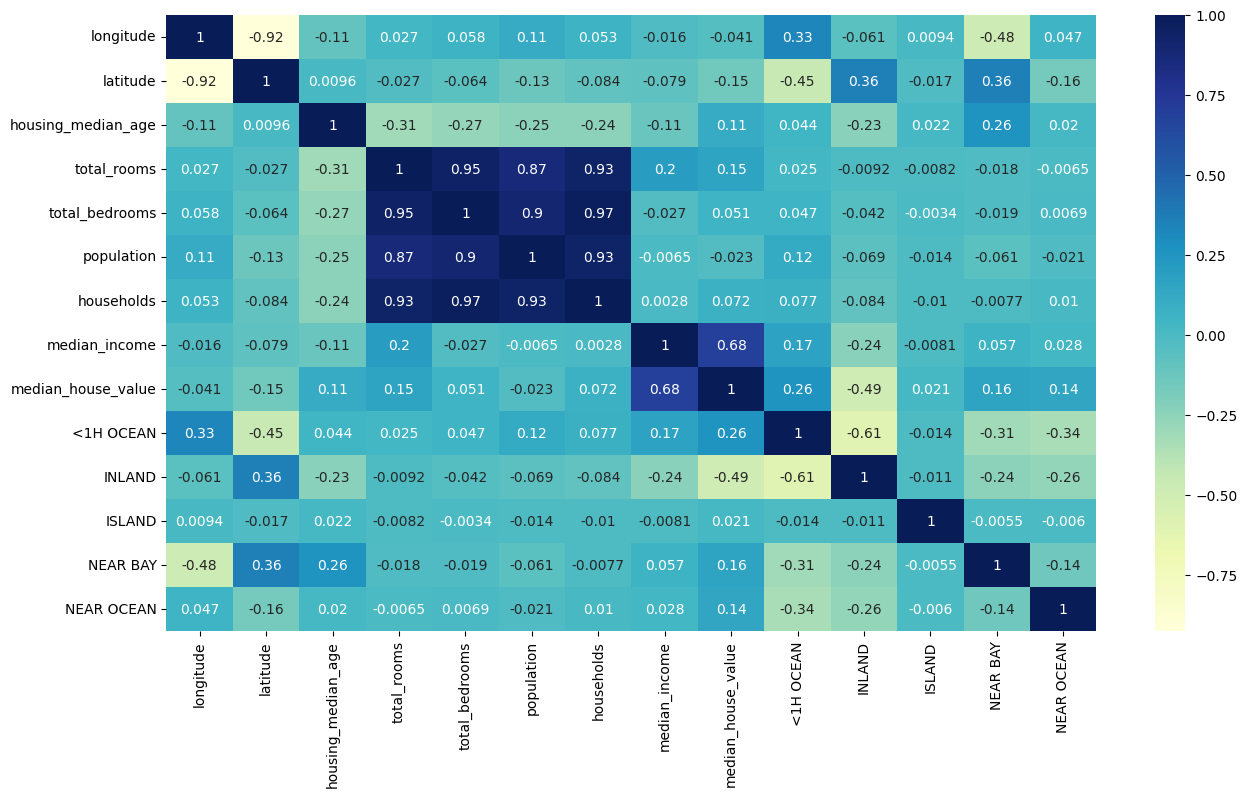

In [114]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(),annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

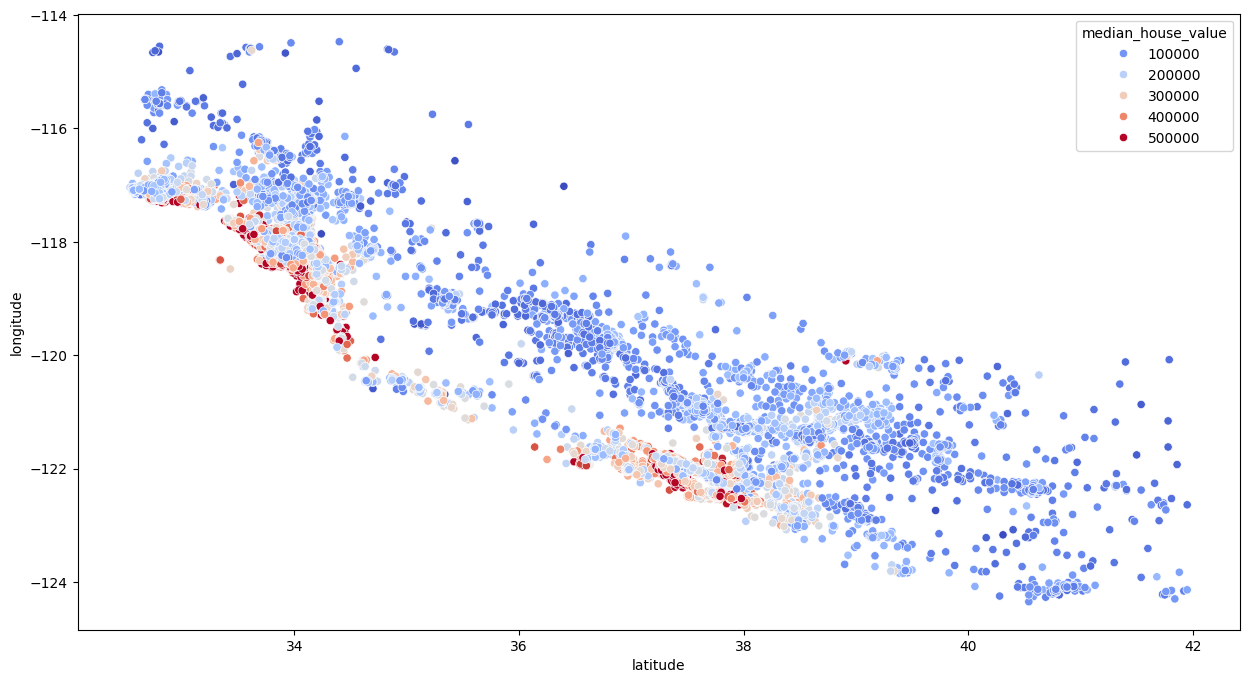

In [115]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

# Data Engineering

In [116]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/ train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/ train_data['households']

<Axes: >

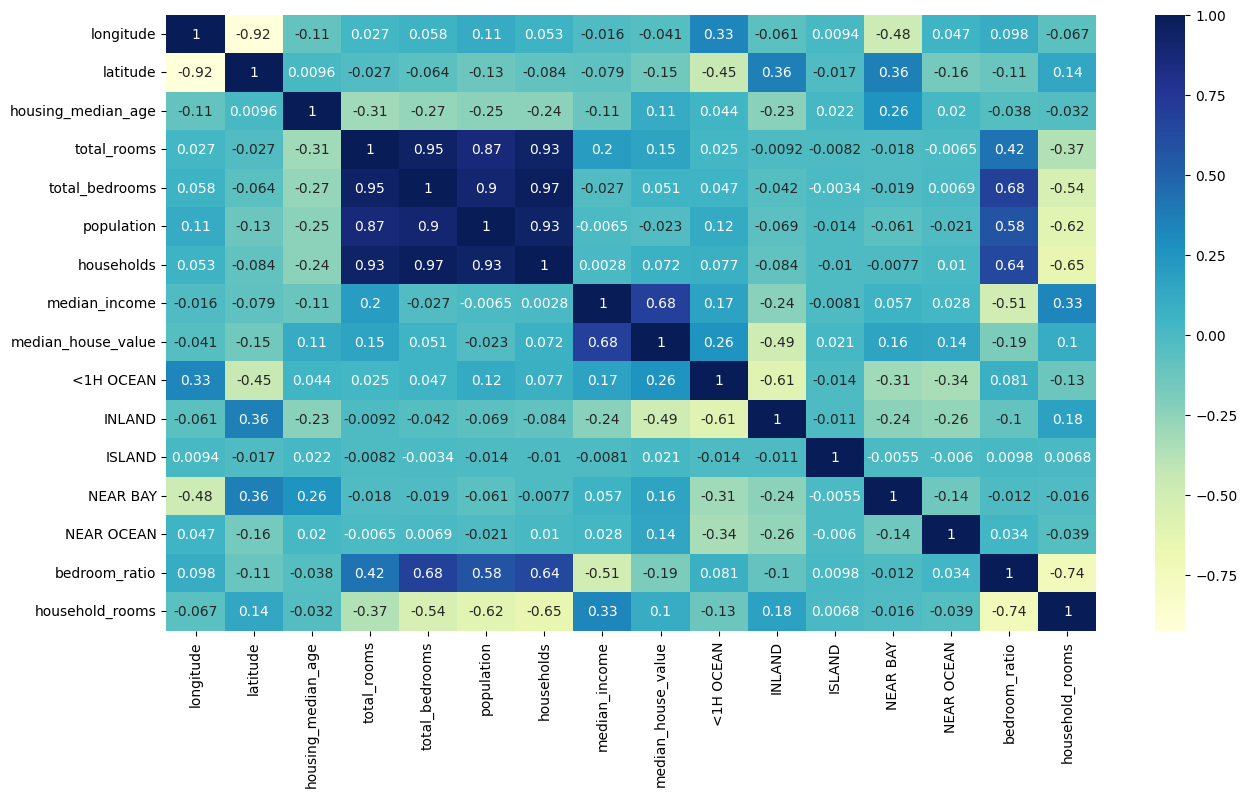

In [117]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap='YlGnBu')

# Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [119]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] /  test_data['households']


In [120]:
X_test, y_test = test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [121]:
reg.score(X_test, y_test)

0.6841050211087827